In [43]:
# utilities
import re
import numpy as np
import pandas as pd
import random
import string
from sklearn import tree
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
import nltk
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
from nltk import word_tokenize
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer

example_sent = """This is a sample sentence,
                  showing off the stop words filtration."""
  
stop_words = set(stopwords.words('english'))
word_tokens = word_tokenize(example_sent)

# converts the words in word_tokens to lower case and then checks whether 
#they are present in stop_words or not
filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
#with no lower case conversion
filtered_sentence = []
  
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)
  
print(word_tokens)
print(filtered_sentence)
print()


['This', 'is', 'a', 'sample', 'sentence', ',', 'showing', 'off', 'the', 'stop', 'words', 'filtration', '.']
['This', 'sample', 'sentence', ',', 'showing', 'stop', 'words', 'filtration', '.']



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# New Section

In [44]:
columns = ["sentiment", "id", "date", "query", "user_id", "text"]
df = pd.read_csv("/content/drive/MyDrive/sem6 myfolder/mldatasets/training.1600000.processed.noemoticon.csv", encoding="latin",names=columns)

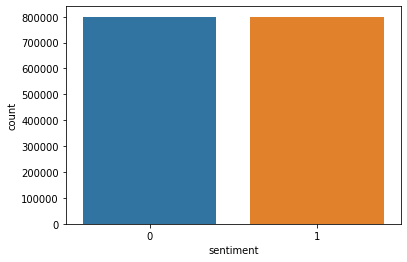

In [45]:
df.head()
df["sentiment"] = df["sentiment"].replace(4,1)
sns.countplot(x="sentiment",data=df)

In [46]:

negative_tweets = df[df['sentiment'] == 0]['text'].tolist()[6996:7996]
positive_tweets = df[df['sentiment'] == 1]['text'].tolist()[1331:2331]
tweet = positive_tweets[random.randint(0,len(positive_tweets))]
print('\033[92m'+tweet)
print('\033[93m')
tweet2 = re.sub(r'https?:\/\/.*[\r\n]*','',tweet);
tweet2 = re.sub(r'#','',tweet2)
print(tweet2)

@Mike_Greening .Man - you need to get back on the horse. 

@Mike_Greening .Man - you need to get back on the horse. 


In [47]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [48]:
tokenizer = TweetTokenizer(preserve_case=False)
tweet_tokens = tokenizer.tokenize(tweet2)
print('Tokenized string: ')
print(tweet_tokens)
stopwords_english = stopwords.words('english')
print(stopwords_english)

Tokenized string: 
['@mike_greening', '.', 'man', '-', 'you', 'need', 'to', 'get', 'back', 'on', 'the', 'horse', '.']
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'bot

In [49]:
for i in range(len(positive_tweets)):
  positive_tweets[i] = re.sub(r'''(https?:\/\/)(\s)*(www\.)?(\s)*((\w|\s)+\.)*([\w\-\s]+\/)*([\w\-]+)((\?)?[\w\s]*=\s*[\w\%&]*)*''','',positive_tweets[i]);
  positive_tweets[i] = re.sub(r'#','',positive_tweets[i])
  negative_tweets[i] = re.sub(r'''(https?:\/\/)(\s)*(www\.)?(\s)*((\w|\s)+\.)*([\w\-\s]+\/)*([\w\-]+)((\?)?[\w\s]*=\s*[\w\%&]*)*''','',negative_tweets[i]);
  negative_tweets[i] = re.sub(r'#','',negative_tweets[i])
tokenizer = TweetTokenizer(preserve_case=False)
for i in range(len(positive_tweets)):
  positive_tweets[i] = tokenizer.tokenize(positive_tweets[i])
  negative_tweets[i] = tokenizer.tokenize(negative_tweets[i])
for i in range(len(positive_tweets)):
  temp_pos = [*positive_tweets[i]]
  positive_tweets[i] = []
  for word in temp_pos:
    if (word not in stopwords_english and word not in string.punctuation):
      positive_tweets[i].append(word)
  temp_neg = [*negative_tweets[i]]
  negative_tweets[i] = []
  for word in temp_neg:
    if (word not in stopwords_english and word not in string.punctuation):
      negative_tweets[i].append(word)
negative_tweets_storage = negative_tweets
positive_tweets_storage = positive_tweets
positive_tweets[0], negative_tweets[0]

(['excited', 'skyhd', 'coming', 'today'], ['sad', 'want', 'cry'])

In [50]:
positive_text = []
for wordlist in positive_tweets:
  positive_text = [*positive_text, " ".join(wordlist)]

In [51]:
negative_text = []
for wordlist in negative_tweets:
  negative_text = [*negative_text, " ".join(wordlist)]

In [52]:
vectorizer = CountVectorizer()
data = []
data_labels = []
for word in positive_text:
  data.append(word)
  data_labels.append(1)
for word in negative_text:
  data.append(word)
  data_labels.append(0)
features = vectorizer.fit_transform(data)
features_nd = features.toarray()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    features_nd,
    data_labels,
    train_size = 0.85,
    random_state = 31
)
model = MultinomialNB()
model.fit(features_nd, data_labels)
MultinomialNB()
y_pred = model.predict(X_test)
print("P ",metrics.precision_score(y_test,y_pred))
print("A ",metrics.accuracy_score(y_test, y_pred))
print("R ",metrics.recall_score(y_test,y_pred))
print("F1 ",metrics.f1_score(y_test,y_pred))

P  0.951048951048951
A  0.94
R  0.9251700680272109
F1  0.9379310344827587


In [53]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_tree_pred = clf.predict(X_test)
print("P ",metrics.precision_score(y_test,y_tree_pred))
print("A ",metrics.accuracy_score(y_test, y_tree_pred))
print("R ",metrics.recall_score(y_test,y_tree_pred))
print("F1 ",metrics.f1_score(y_test,y_tree_pred))

P  0.6214689265536724
A  0.6533333333333333
R  0.7482993197278912
F1  0.6790123456790124


In [54]:
# Naive bayes perfoms better.